## Welcome!
Language  | Jasper Hooker
------------- | -------------
<img src='https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg' width='200' alt='bigrunmoment'> | <img src='https://i.imgur.com/8zfa5rd.jpg' width='200' alt='bigrunmoment'>
Created with Python | Everything created by yours truly

### VERTICAL VERSION
Scroll till the 'Axvline' Heading is shown, the code from there below is added to make the timeline vertical!

(Also pay attention to the imports, below. You will need timedelta from datetime)

Enjoy!

In [8]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
#The below code is needed for VERTICAL CONVERSION
from datetime import timedelta
%matplotlib inline

## Data

In [9]:
dates = [date(1954, 7, 19), date(1959, 2, 3), date(1964, 2, 9), date(1965, 7, 25), date(1967, 6, 1), date(1969, 8, 15)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Elvis appears on\nthe Ed Sullivan Show', 'Buddy Holly dies', 'The Beatles appear\non the Ed Sullivan Show', 
          'Bob Dylan goes electric', 'The Beatles release\nSgt. Pepper', 'Woodstock']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]
## Data taken from w3schools

## Timeline and Points

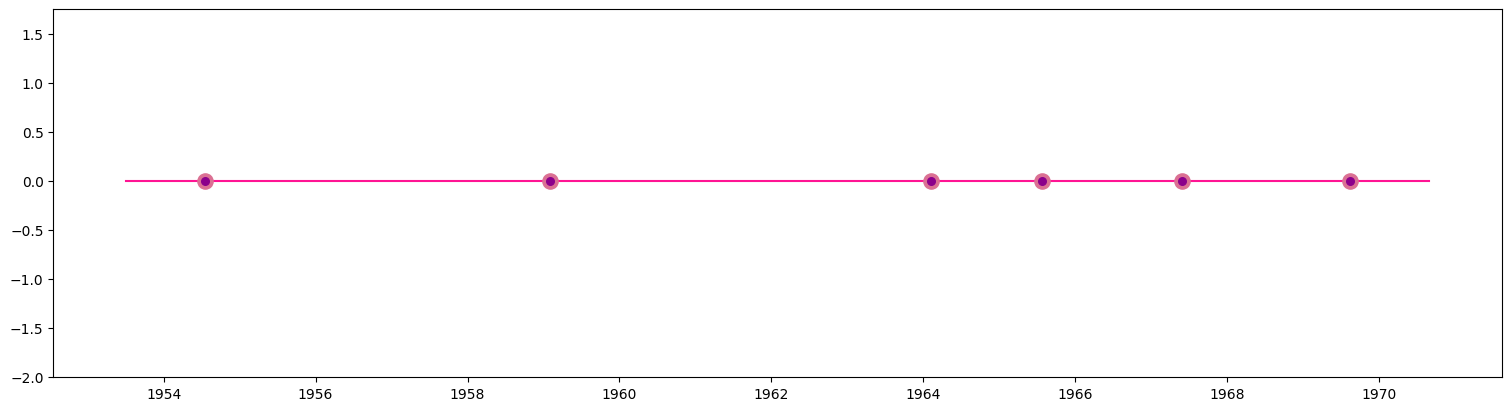

In [10]:
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
_ = ax.set_ylim(-2, 1.75)
_ = ax.set_xlim(min_date, max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

## Labels

In [11]:
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

## Adding Lollipops

In [12]:
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

/var/folders/_2/sj_hfblj2g92l_ksl3smwbqh0000gn/T/ipykernel_84657/1230838966.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)


## Axvline

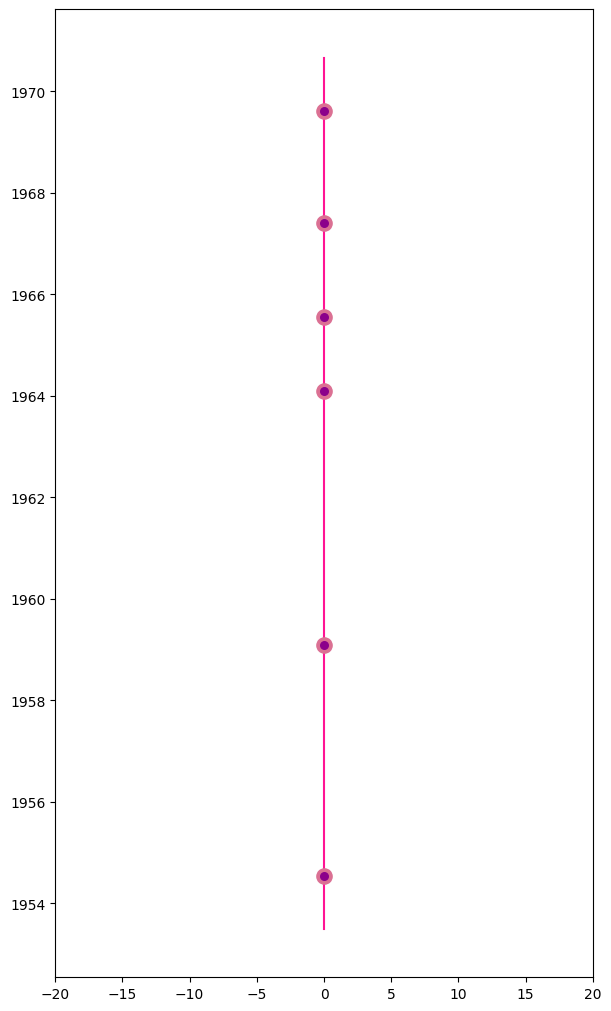

In [13]:
fig, ax = plt.subplots(figsize=(6, 10), constrained_layout=True)
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(min_date, max_date)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(np.zeros(len(dates)), dates, s=120, c='palevioletred', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)

## Quick Date Adjustment

In [14]:
label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -2.0
for i, (l, d) in enumerate(zip(labels, dates)):
    d = d - timedelta(days=90)
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

## Fix 'stem' function

In [15]:
stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0   
x = ax.hlines(dates, 0, stems, color='darkmagenta')

## Clean Up
Fixing the code to clear up excess lines

In [16]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')

In [17]:
fig.savefig("vertical.png")